In [36]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fft2,ifft, fftshift, hfft
import matplotlib.pyplot as plt
import skimage
from skimage import io
import cv2 as cv
import math

In [73]:
#Función
def getfilters(radio):
    x = np.linspace(-249, 250,500)
    y = np.linspace(-249, 250, 500)
    # full coordinate arrays
    xx, yy = np.meshgrid(x, y)
    zz = np.sqrt(xx**2 + yy**2)
    cL2 = zz < radio
    cL = np.asarray(cL2).astype(int)
    cH2 = np.logical_not(cL2)
    cH = np.asarray(cH2).astype(int)
    return cL, cH

(500, 500, 3)


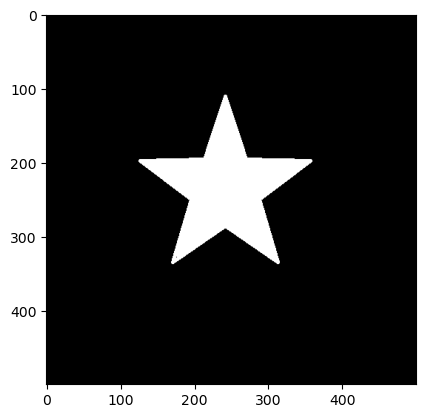

In [74]:
#Leer una imagen
Im = io.imread('miimagen1.png')
plt.imshow(Im)
print(Im.shape)

In [75]:
#Extraemos un plano de la imagen (solo si la imagen es de 3 planos)
im = Im[:,:,2]
#Aplicamos TF y visualizamos
ft = np.fft.fftshift(np.fft.fft2(im))

C:\Users\ACER\AppData\Local\Temp\ipykernel_7144\557361270.py:21: RuntimeWarning: divide by zero encountered in log
  im = axes[0,0].imshow(np.log(abs(l_ft)), cmap='gray')
C:\Users\ACER\AppData\Local\Temp\ipykernel_7144\557361270.py:25: RuntimeWarning: divide by zero encountered in log
  axes[0,1].imshow(np.log(abs(h_ft)), cmap='gray')


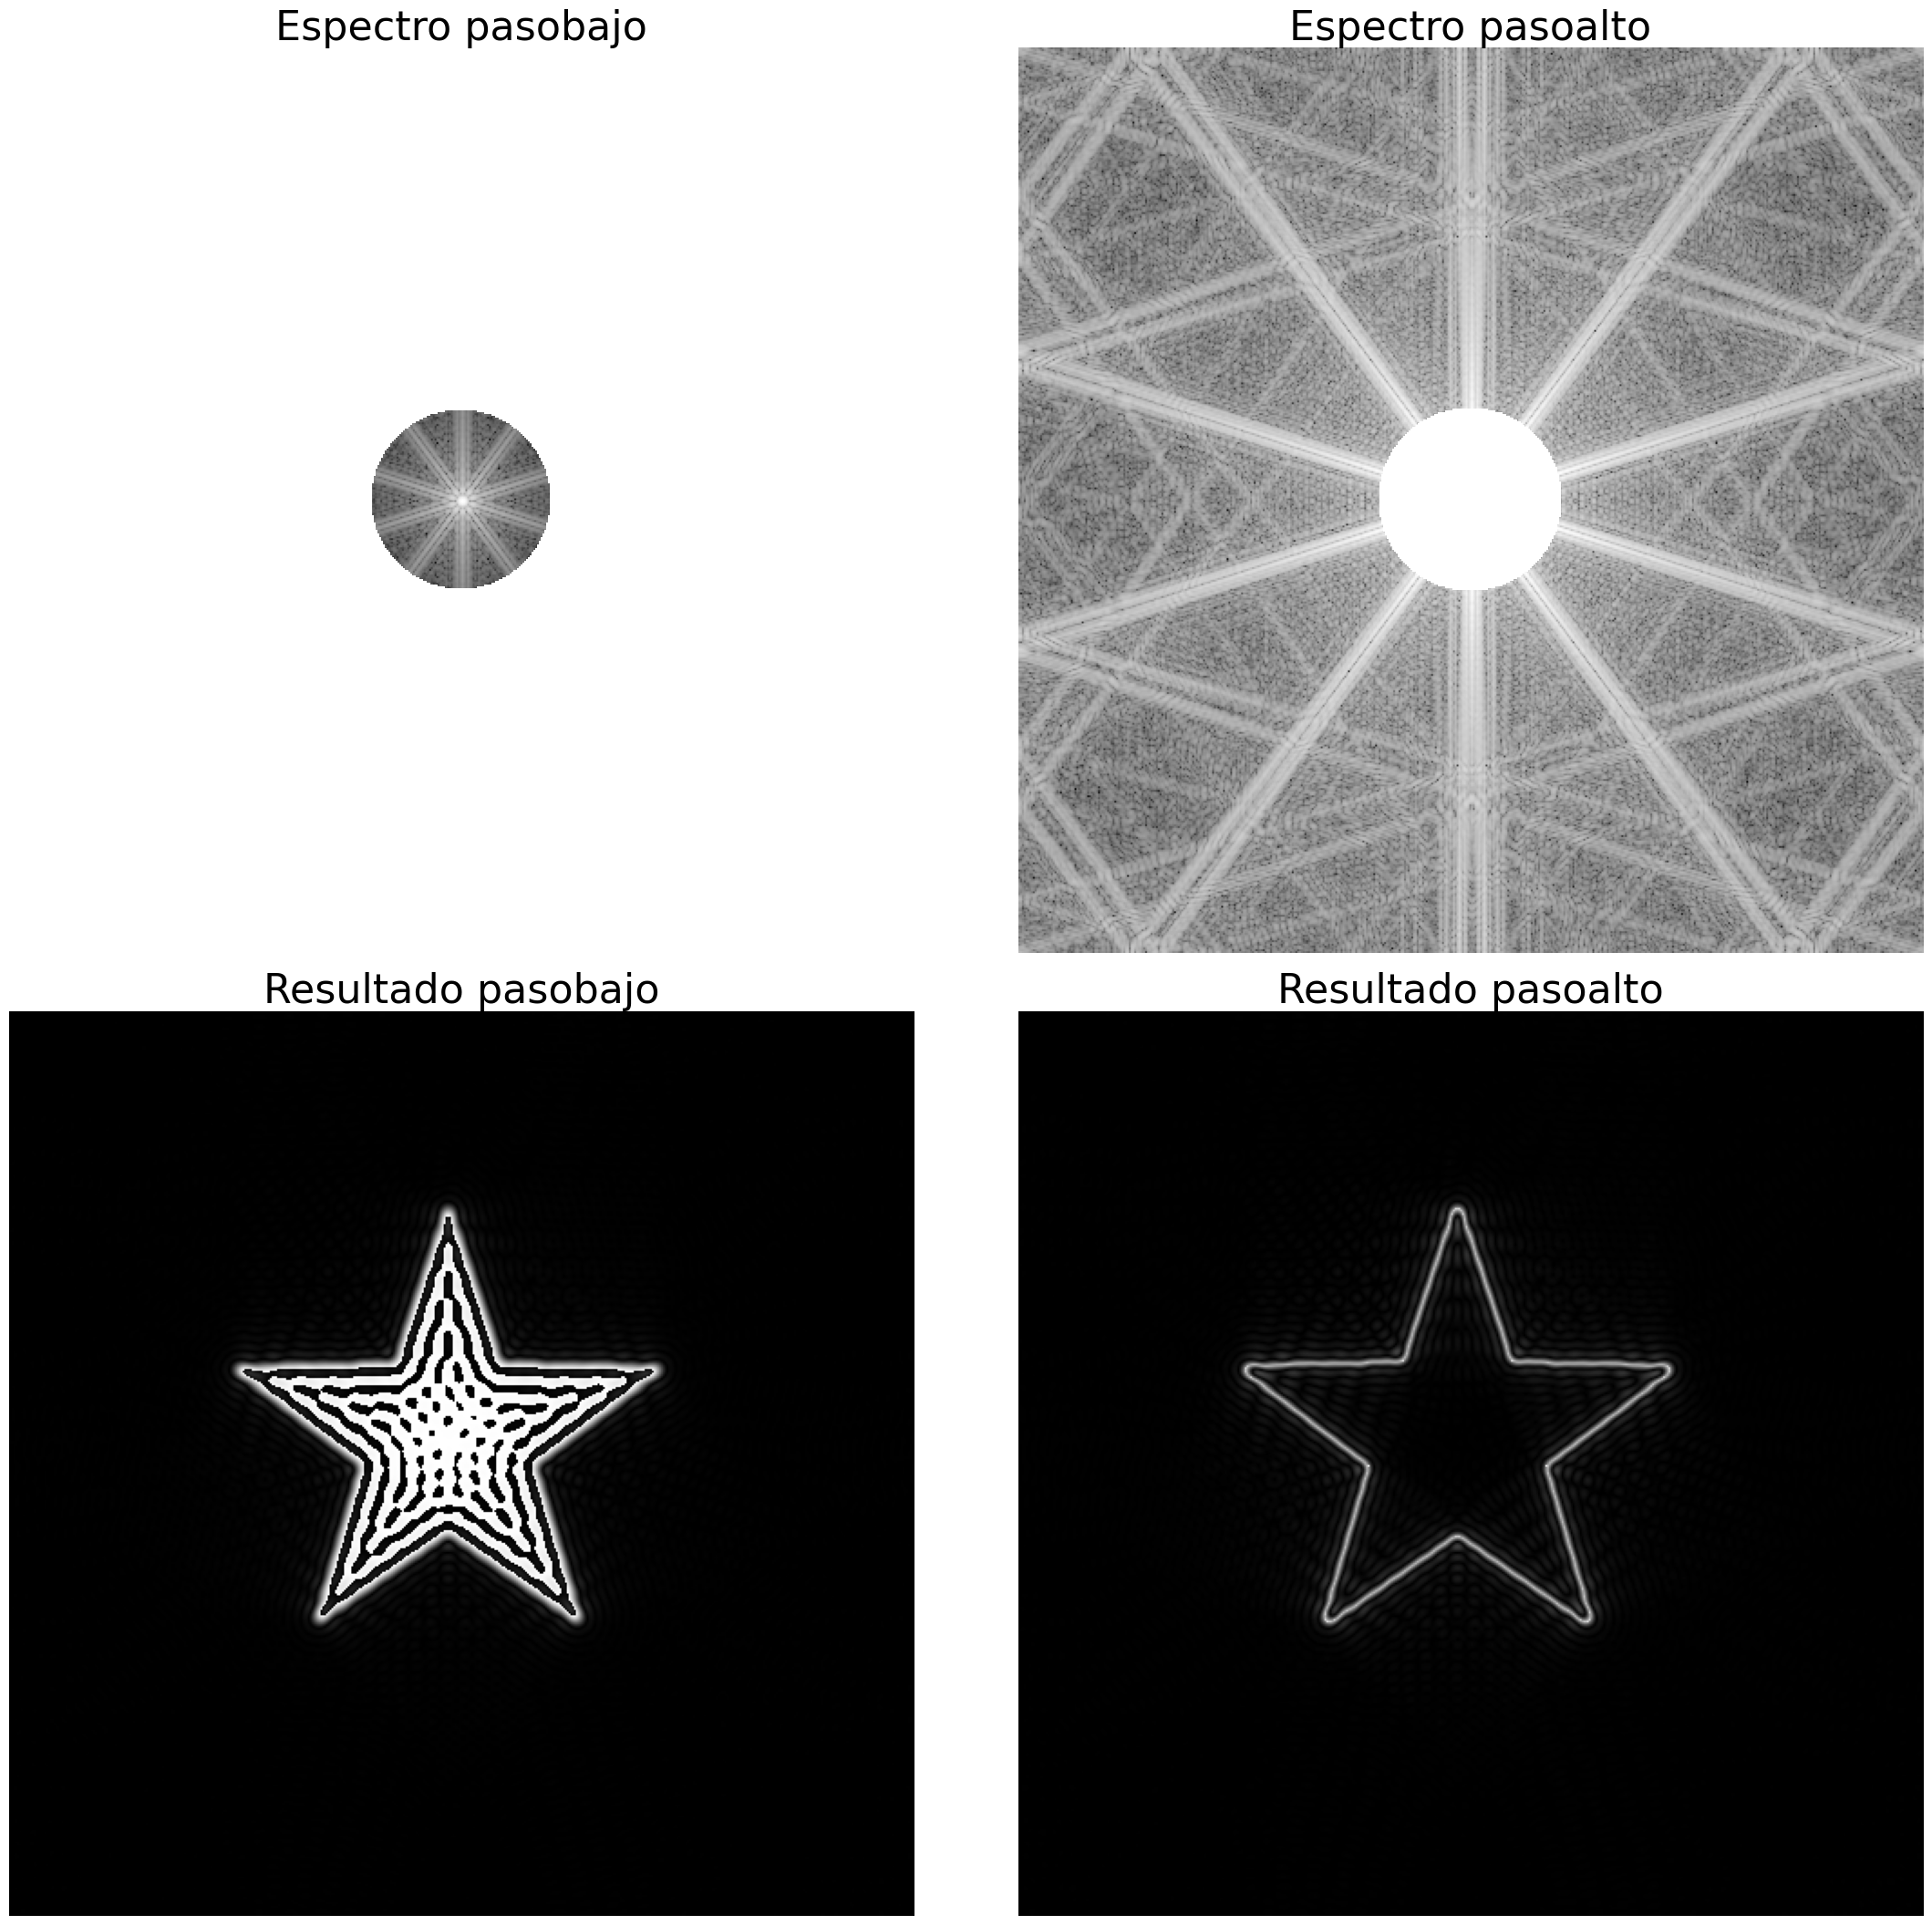

In [80]:
# getfilters crea un círculo simétrico que hará de filtro 
# en el espacio de Fourier
cL, cH = getfilters(50)       #Ver definición función
#Pasabajas
l_ft = ft*cL
#Pasaaltas
h_ft = ft*cH;
#% Volver al espacio directo, se hace la TF inversa
low_filtered_image =  np.fft.ifft2(l_ft)
high_filtered_image = np.fft.ifft2(h_ft)

#Se arrastran artefactos imaginarios aún, entonces se eliminan 
#y se adecúan los datos para visualización
low_f = np.uint8(abs(low_filtered_image))
high_f = np.uint8(abs(high_filtered_image))

fig, axes = plt.subplots(2, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0,0].imshow(np.log(abs(l_ft)), cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Espectro pasobajo', fontsize=32)

axes[0,1].imshow(np.log(abs(h_ft)), cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Espectro pasoalto', fontsize=32)

axes[1,0].imshow(low_f, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Resultado pasobajo', fontsize=32)

axes[1,1].imshow(high_f, cmap='gray')
axes[1,1].axis('off')
axes[1,1].set_title('Resultado pasoalto', fontsize=32)
plt.show()